📊 Пропущенные значения в sales: 1
✅ Пропуск заполнен медианным значением для дня 4: 286
✅ Данные загружены: 74 строк, 10 колонок
📅 Период: с 2025-12-01 по 2026-02-12
💰 Диапазон продаж: 97 - 696

📊 Базовая статистика:
       sales  tempday  tempnight
count   74.0     74.0       74.0
mean   322.5     -3.2       -9.4
std    132.6      6.0        8.8
min     97.0    -14.0      -29.0
25%    202.2     -8.8      -16.8
50%    339.5     -2.5       -8.0
75%    416.2      1.0       -2.0
max    696.0      9.0        6.0

❄️ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ В СНЕЖНУЮ ПОГОДУ

Доступные визуализации:
1️⃣  Гистограммы (распределения sales, temperature)
2️⃣  Линейные графики (временные ряды)
3️⃣  Диаграммы рассеяния (зависимость от температуры)
4️⃣  Анализ по дням недели
5️⃣  Погодный анализ
0️⃣  Выход

📊 Гистограммы:


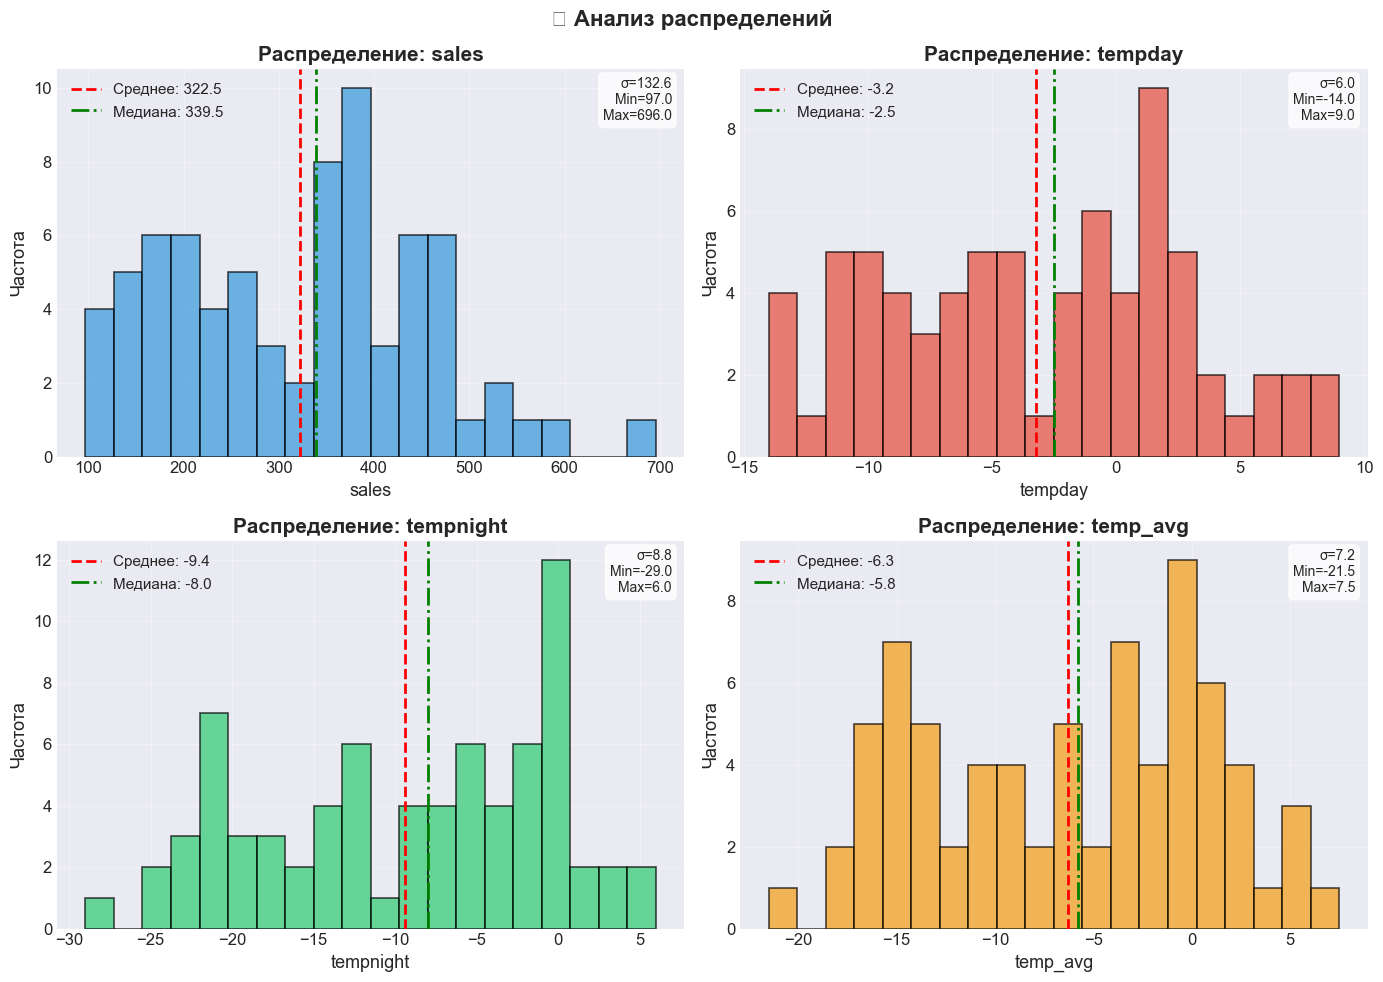


❄️ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ В СНЕЖНУЮ ПОГОДУ

Доступные визуализации:
1️⃣  Гистограммы (распределения sales, temperature)
2️⃣  Линейные графики (временные ряды)
3️⃣  Диаграммы рассеяния (зависимость от температуры)
4️⃣  Анализ по дням недели
5️⃣  Погодный анализ
0️⃣  Выход

📈 Линейные графики:


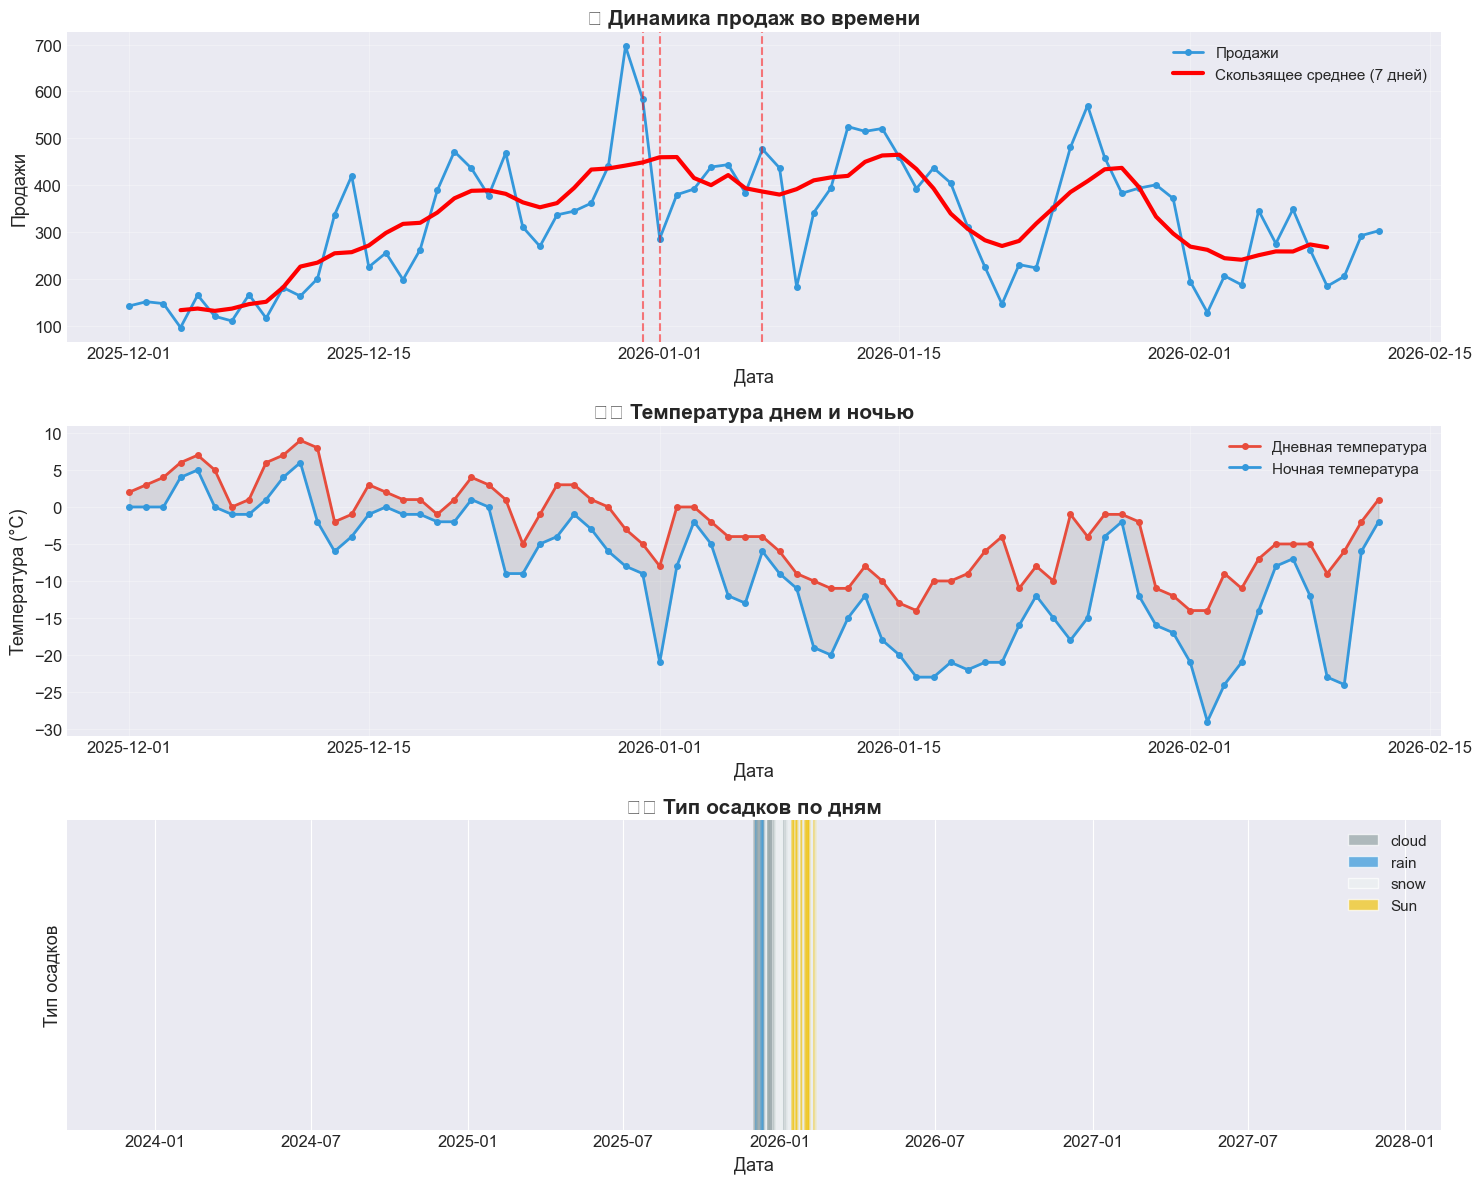


❄️ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ В СНЕЖНУЮ ПОГОДУ

Доступные визуализации:
1️⃣  Гистограммы (распределения sales, temperature)
2️⃣  Линейные графики (временные ряды)
3️⃣  Диаграммы рассеяния (зависимость от температуры)
4️⃣  Анализ по дням недели
5️⃣  Погодный анализ
0️⃣  Выход

🔍 Диаграммы рассеяния:
1. Продажи vs Дневная температура
2. Продажи vs Ночная температура
3. Продажи vs Средняя температура


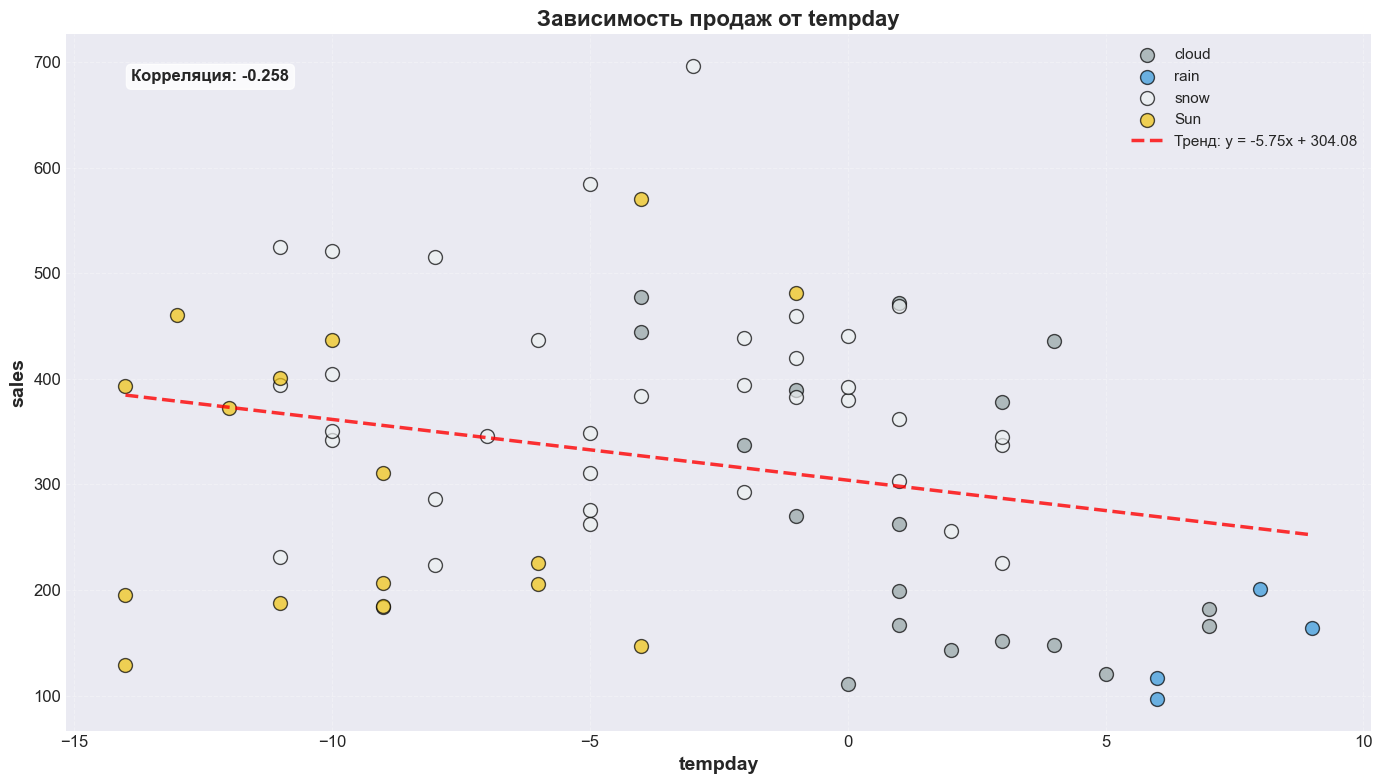


❄️ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ В СНЕЖНУЮ ПОГОДУ

Доступные визуализации:
1️⃣  Гистограммы (распределения sales, temperature)
2️⃣  Линейные графики (временные ряды)
3️⃣  Диаграммы рассеяния (зависимость от температуры)
4️⃣  Анализ по дням недели
5️⃣  Погодный анализ
0️⃣  Выход

📅 Анализ по дням недели:


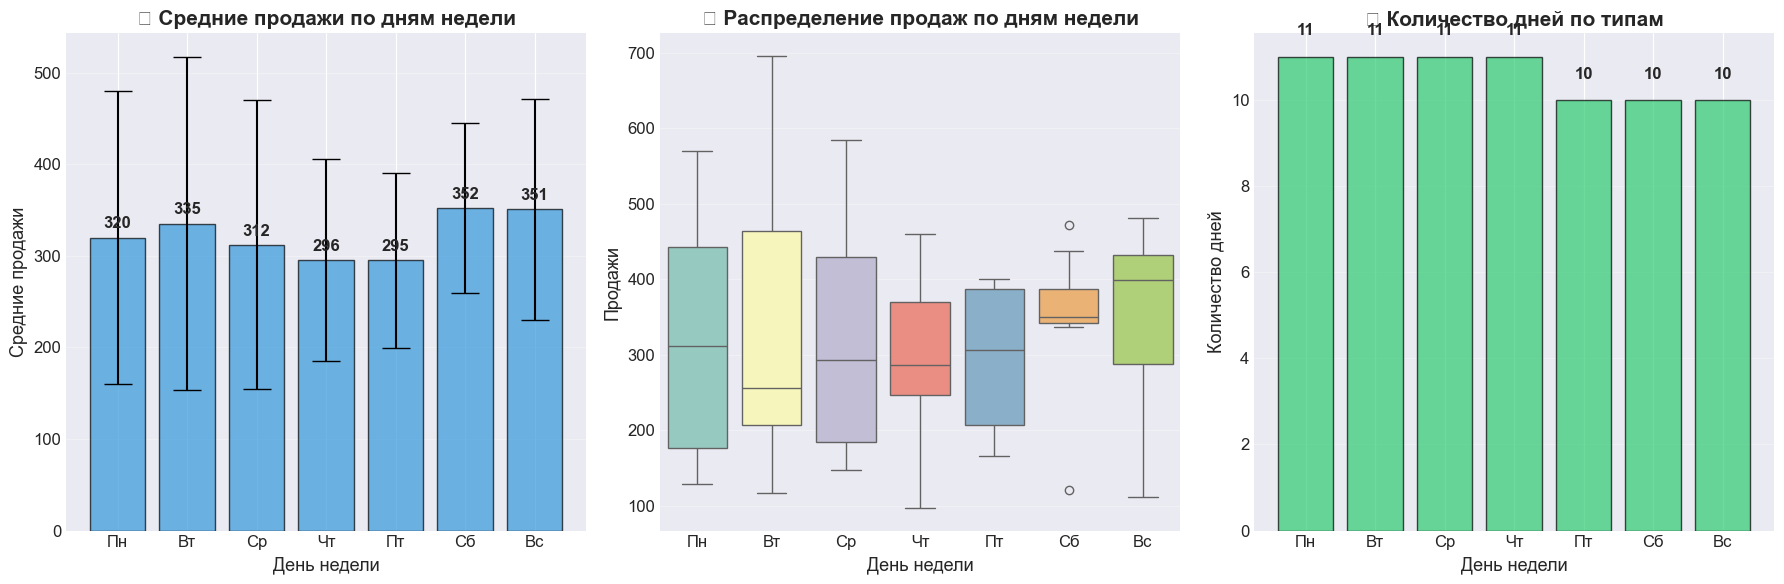


❄️ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ В СНЕЖНУЮ ПОГОДУ

Доступные визуализации:
1️⃣  Гистограммы (распределения sales, temperature)
2️⃣  Линейные графики (временные ряды)
3️⃣  Диаграммы рассеяния (зависимость от температуры)
4️⃣  Анализ по дням недели
5️⃣  Погодный анализ
0️⃣  Выход

🌤️ Погодный анализ:


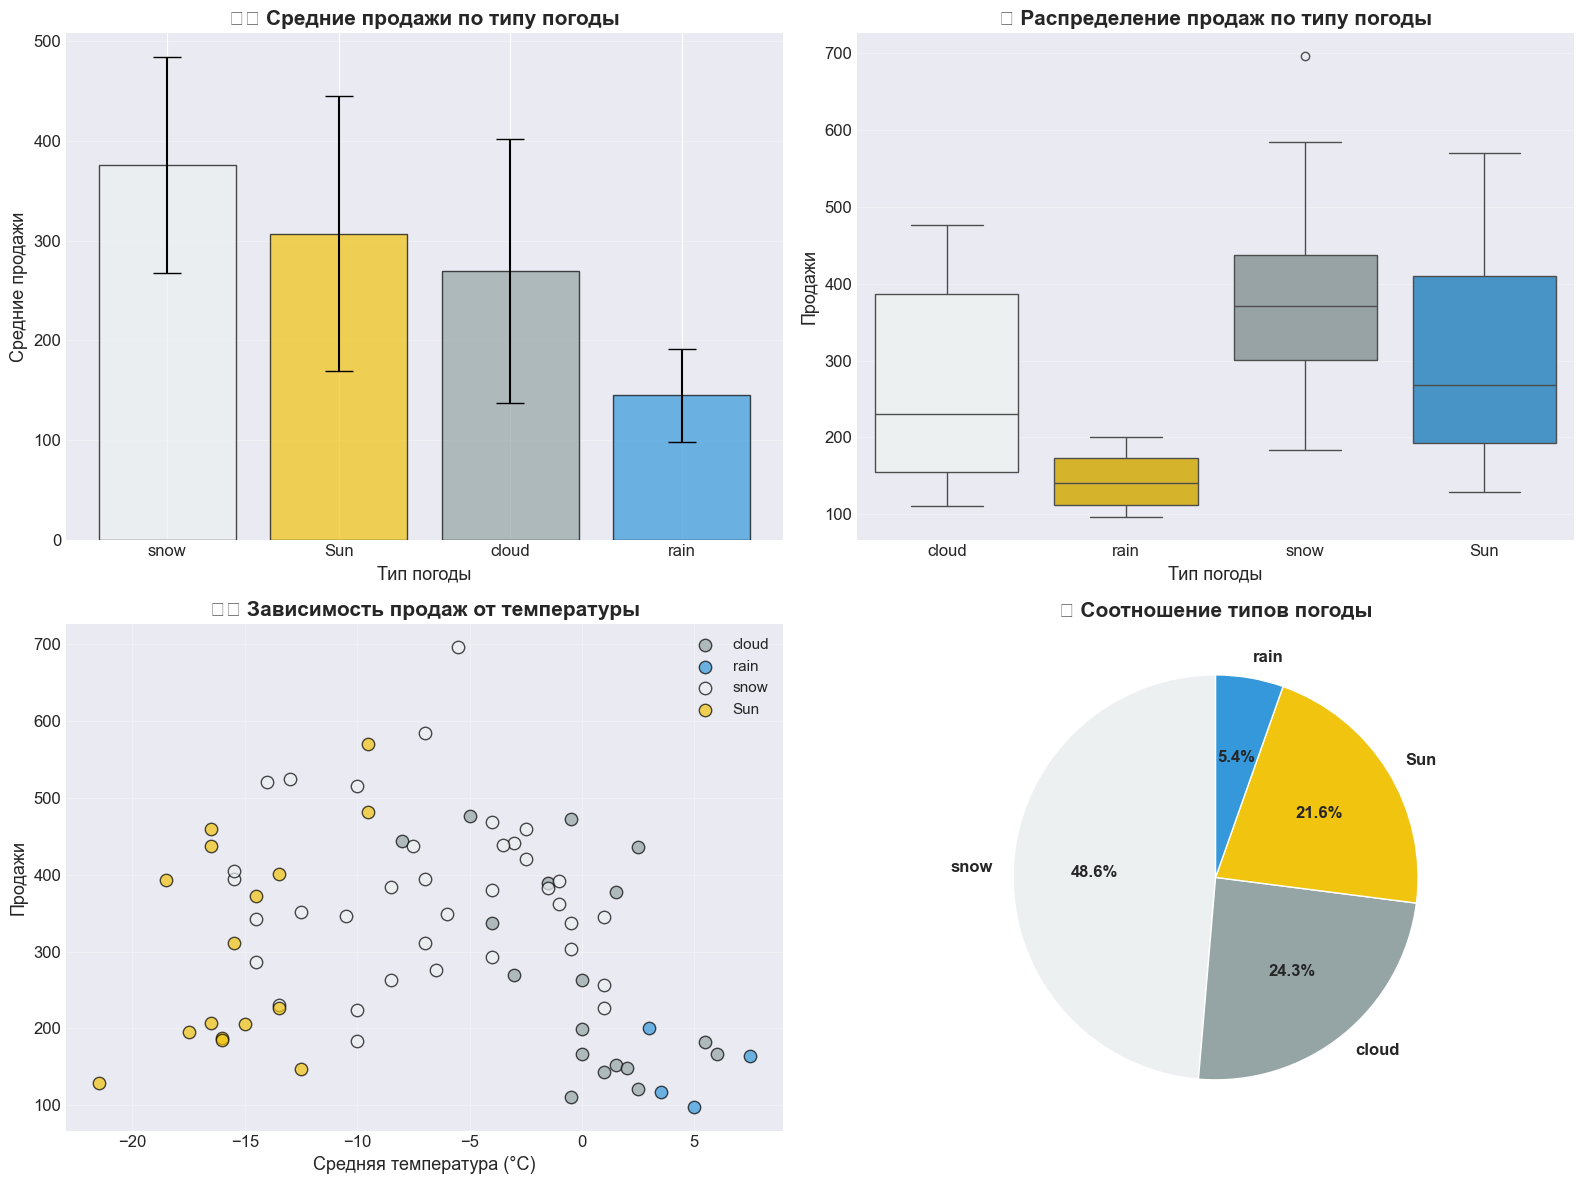


❄️ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ В СНЕЖНУЮ ПОГОДУ

Доступные визуализации:
1️⃣  Гистограммы (распределения sales, temperature)
2️⃣  Линейные графики (временные ряды)
3️⃣  Диаграммы рассеяния (зависимость от температуры)
4️⃣  Анализ по дням недели
5️⃣  Погодный анализ
0️⃣  Выход


KeyboardInterrupt: Interrupted by user

In [1]:
"""
Модуль визуализации для анализа данных о продажах в снежную погоду
Данные: DatasetSnowSales1.csv
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import Optional, List, Union, Tuple, Dict
import warnings

warnings.filterwarnings('ignore')

# Настройка стилей для профессиональных графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 11


class SnowSalesVisualizer:
    """
    Класс для визуализации данных о продажах в зимний период
    """

    def __init__(self, file_path: str = 'DatasetSnowSales1.csv'):
        """
        Инициализация с загрузкой данных
        """
        self.file_path = file_path
        self.df = None
        self.weather_colors = {
            'cloud': '#95a5a6',  # серый
            'rain': '#3498db',  # синий
            'snow': '#ecf0f1',  # белый/светло-серый
            'Sun': '#f1c40f'  # желтый
        }
        self.load_data()

    def load_data(self):
        """Загрузка и предобработка данных"""
        if not Path(self.file_path).exists():
            print(f"❌ Файл не найден: {self.file_path}")
            return False

        try:
            # Загрузка с правильным разделителем (;)
            self.df = pd.read_csv(self.file_path, delimiter=';', encoding='utf-8')

            # Преобразование даты
            self.df['Date'] = pd.to_datetime(self.df['Date'], format='%d.%m.%Y')

            # Обработка пропущенных значений в sales
            print(f"📊 Пропущенные значения в sales: {self.df['sales'].isnull().sum()}")

            # Заполним пропуск медианным значением для этого дня недели
            missing_date = self.df[self.df['sales'].isnull()]['Date'].iloc[0]
            missing_dayweek = self.df[self.df['sales'].isnull()]['dayweek'].iloc[0]
            median_sales = self.df[self.df['dayweek'] == missing_dayweek]['sales'].median()

            self.df.loc[self.df['sales'].isnull(), 'sales'] = median_sales
            print(f"✅ Пропуск заполнен медианным значением для дня {missing_dayweek}: {median_sales:.0f}")

            # Преобразование типов
            self.df['sales'] = pd.to_numeric(self.df['sales'])
            self.df['tempday'] = pd.to_numeric(self.df['tempday'])
            self.df['tempnight'] = pd.to_numeric(self.df['tempnight'])
            self.df['dayweek'] = pd.to_numeric(self.df['dayweek'])

            # Добавим полезные колонки
            self.df['month'] = self.df['Date'].dt.month
            self.df['day'] = self.df['Date'].dt.day
            self.df['week'] = self.df['Date'].dt.isocalendar().week
            self.df['temp_avg'] = (self.df['tempday'] + self.df['tempnight']) / 2

            print(f"✅ Данные загружены: {self.df.shape[0]} строк, {self.df.shape[1]} колонок")
            print(f"📅 Период: с {self.df['Date'].min().date()} по {self.df['Date'].max().date()}")
            print(f"💰 Диапазон продаж: {self.df['sales'].min():.0f} - {self.df['sales'].max():.0f}")

            return True

        except Exception as e:
            print(f"❌ Ошибка загрузки: {e}")
            return False

    # =========================================================================
    # 1. ГИСТОГРАММЫ
    # =========================================================================

    def plot_histograms(self, columns: List[str] = None, save_path: Optional[str] = None):
        """
        Построение гистограмм для анализа распределений
        ИСПРАВЛЕНО: правильная обработка columns
        """
        if self.df is None:
            print("❌ Данные не загружены")
            return

        if columns is None:
            columns = ['sales', 'tempday', 'tempnight', 'temp_avg']

        # Фильтруем только существующие колонки
        columns = [col for col in columns if col in self.df.columns]

        if not columns:
            print("❌ Нет доступных колонок для визуализации")
            return

        # Создаем сетку графиков
        n_cols = min(2, len(columns))
        n_rows = (len(columns) + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = np.array([axes])
        axes = axes.flatten()

        colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

        for idx, (col, color) in enumerate(zip(columns, colors)):
            ax = axes[idx]
            data = self.df[col].dropna()

            # Гистограмма
            n, bins, patches = ax.hist(data, bins=20, density=False,
                                       alpha=0.7, color=color, edgecolor='black',
                                       linewidth=1.2)

            # Статистика
            mean_val = data.mean()
            median_val = data.median()
            std_val = data.std()

            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2,
                       label=f'Среднее: {mean_val:.1f}')
            ax.axvline(median_val, color='green', linestyle='-.', linewidth=2,
                       label=f'Медиана: {median_val:.1f}')

            # Метрики
            stats_text = f'σ={std_val:.1f}\nMin={data.min():.1f}\nMax={data.max():.1f}'
            ax.text(0.98, 0.98, stats_text, transform=ax.transAxes,
                    ha='right', va='top', fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

            ax.set_title(f'Распределение: {col}', fontweight='bold')
            ax.set_xlabel(col)
            ax.set_ylabel('Частота')
            ax.legend(loc='upper left')
            ax.grid(True, alpha=0.3)

        # Скрываем лишние графики
        for idx in range(len(columns), len(axes)):
            axes[idx].set_visible(False)

        plt.suptitle('📊 Анализ распределений', fontsize=16, fontweight='bold')
        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 График сохранен: {save_path}")

        plt.show()

    # =========================================================================
    # 2. ЛИНЕЙНЫЕ ГРАФИКИ
    # =========================================================================

    def plot_time_series(self, save_path: Optional[str] = None):
        """
        Линейные графики временных рядов
        ИСПРАВЛЕНО: правильная обработка дат
        """
        if self.df is None:
            print("❌ Данные не загружены")
            return

        fig, axes = plt.subplots(3, 1, figsize=(15, 12))

        # 1. Продажи по времени
        ax1 = axes[0]
        ax1.plot(self.df['Date'], self.df['sales'], 'o-', color='#3498db',
                 linewidth=2, markersize=4, label='Продажи')

        # Добавляем скользящее среднее
        rolling_mean = self.df['sales'].rolling(window=7, center=True).mean()
        ax1.plot(self.df['Date'], rolling_mean, 'r-', linewidth=3,
                 label='Скользящее среднее (7 дней)')

        # Отмечаем праздники
        holidays = ['2025-12-31', '2026-01-01', '2026-01-07']
        for holiday in holidays:
            ax1.axvline(pd.to_datetime(holiday), color='red', linestyle='--', alpha=0.5)

        ax1.set_title('📈 Динамика продаж во времени', fontweight='bold')
        ax1.set_xlabel('Дата')
        ax1.set_ylabel('Продажи')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. Температура днем и ночью
        ax2 = axes[1]
        ax2.plot(self.df['Date'], self.df['tempday'], 'o-', color='#e74c3c',
                 linewidth=2, markersize=4, label='Дневная температура')
        ax2.plot(self.df['Date'], self.df['tempnight'], 'o-', color='#3498db',
                 linewidth=2, markersize=4, label='Ночная температура')
        ax2.fill_between(self.df['Date'], self.df['tempnight'], self.df['tempday'],
                         alpha=0.2, color='gray')
        ax2.set_title('🌡️ Температура днем и ночью', fontweight='bold')
        ax2.set_xlabel('Дата')
        ax2.set_ylabel('Температура (°C)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. Осадки по дням
        ax3 = axes[2]
        weather_counts = self.df.groupby('Date')['precipitation'].first()
        colors = [self.weather_colors.get(w, '#95a5a6') for w in weather_counts.values]

        for date, weather in weather_counts.items():
            color = self.weather_colors.get(weather, '#95a5a6')
            ax3.axvline(date, color=color, alpha=0.5, linewidth=2)

        ax3.set_title('☁️ Тип осадков по дням', fontweight='bold')
        ax3.set_xlabel('Дата')
        ax3.set_ylabel('Тип осадков')
        ax3.set_yticks([])

        # Легенда для погоды
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=color, label=weather, alpha=0.7)
                           for weather, color in self.weather_colors.items()]
        ax3.legend(handles=legend_elements, loc='upper right')

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 График сохранен: {save_path}")

        plt.show()

    # =========================================================================
    # 3. ДИАГРАММЫ РАССЕЯНИЯ
    # =========================================================================

    def plot_scatter(self, x_col: str = 'tempday', y_col: str = 'sales',
                     color_by: str = 'precipitation', save_path: Optional[str] = None):
        """
        Диаграмма рассеяния с цветовым кодированием по погоде
        ИСПРАВЛЕНО: правильная обработка цветов
        """
        if self.df is None:
            print("❌ Данные не загружены")
            return

        fig, ax = plt.subplots(figsize=(14, 8))

        # Создаем scatter plot с цветами по погоде
        for weather in self.df['precipitation'].unique():
            mask = self.df['precipitation'] == weather
            color = self.weather_colors.get(weather, '#95a5a6')

            ax.scatter(self.df.loc[mask, x_col], self.df.loc[mask, y_col],
                       c=color, label=weather, s=100, alpha=0.7,
                       edgecolors='black', linewidth=1)

        # Добавляем линию тренда
        z = np.polyfit(self.df[x_col], self.df[y_col], 1)
        p = np.poly1d(z)
        x_line = np.linspace(self.df[x_col].min(), self.df[x_col].max(), 100)
        ax.plot(x_line, p(x_line), "r--", linewidth=2.5, alpha=0.8,
                label=f'Тренд: y = {z[0]:.2f}x + {z[1]:.2f}')

        # Корреляция
        corr = self.df[x_col].corr(self.df[y_col])
        ax.text(0.05, 0.95, f'Корреляция: {corr:.3f}', transform=ax.transAxes,
                fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                verticalalignment='top', fontweight='bold')

        ax.set_xlabel(x_col, fontsize=14, fontweight='bold')
        ax.set_ylabel(y_col, fontsize=14, fontweight='bold')
        ax.set_title(f'Зависимость продаж от {x_col}', fontsize=16, fontweight='bold')
        ax.legend(loc='best', fontsize=11)
        ax.grid(True, alpha=0.3, linestyle='--')

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 График сохранен: {save_path}")

        plt.show()

    # =========================================================================
    # 4. ДИАГРАММА ПО ДНЯМ НЕДЕЛИ
    # =========================================================================

    def plot_weekday_analysis(self, save_path: Optional[str] = None):
        """
        Анализ продаж по дням недели
        ИСПРАВЛЕНО: добавлен этот метод для опции 4
        """
        if self.df is None:
            print("❌ Данные не загружены")
            return

        # Словарь для дней недели
        weekdays = {1: 'Пн', 2: 'Вт', 3: 'Ср', 4: 'Чт', 5: 'Пт', 6: 'Сб', 7: 'Вс'}
        self.df['weekday_name'] = self.df['dayweek'].map(weekdays)

        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # 1. Средние продажи по дням недели
        ax1 = axes[0]
        weekday_sales = self.df.groupby('weekday_name')['sales'].agg(['mean', 'std']).reindex(
            ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])

        ax1.bar(weekday_sales.index, weekday_sales['mean'], yerr=weekday_sales['std'],
                capsize=10, color='#3498db', edgecolor='black', alpha=0.7)
        ax1.set_xlabel('День недели')
        ax1.set_ylabel('Средние продажи')
        ax1.set_title('📊 Средние продажи по дням недели', fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')

        # Добавляем значения
        for i, (idx, row) in enumerate(weekday_sales.iterrows()):
            ax1.text(i, row['mean'] + 10, f'{row["mean"]:.0f}',
                     ha='center', fontweight='bold')

        # 2. Box plot продаж по дням недели
        ax2 = axes[1]
        df_weekday = self.df.copy()
        df_weekday['weekday_name'] = pd.Categorical(df_weekday['weekday_name'],
                                                    categories=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'],
                                                    ordered=True)

        sns.boxplot(data=df_weekday, x='weekday_name', y='sales', ax=ax2, palette='Set3')
        ax2.set_xlabel('День недели')
        ax2.set_ylabel('Продажи')
        ax2.set_title('📦 Распределение продаж по дням недели', fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')

        # 3. Количество наблюдений по дням недели
        ax3 = axes[2]
        day_counts = self.df['weekday_name'].value_counts().reindex(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])

        ax3.bar(day_counts.index, day_counts.values, color='#2ecc71', edgecolor='black', alpha=0.7)
        ax3.set_xlabel('День недели')
        ax3.set_ylabel('Количество дней')
        ax3.set_title('📊 Количество дней по типам', fontweight='bold')
        ax3.grid(True, alpha=0.3, axis='y')

        for i, (idx, val) in enumerate(day_counts.items()):
            ax3.text(i, val + 0.5, str(val), ha='center', fontweight='bold')

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 График сохранен: {save_path}")

        plt.show()

    # =========================================================================
    # 5. ПОГОДНЫЙ АНАЛИЗ
    # =========================================================================

    def plot_weather_analysis(self, save_path: Optional[str] = None):
        """
        Анализ влияния погоды на продажи
        ИСПРАВЛЕНО: добавлен этот метод для опции 5
        """
        if self.df is None:
            print("❌ Данные не загружены")
            return

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 1. Средние продажи по типу погоды
        ax1 = axes[0, 0]
        weather_sales = self.df.groupby('precipitation')['sales'].agg(['mean', 'std']).sort_values('mean',
                                                                                                   ascending=False)

        colors = [self.weather_colors.get(w, '#95a5a6') for w in weather_sales.index]
        ax1.bar(weather_sales.index, weather_sales['mean'], yerr=weather_sales['std'],
                capsize=10, color=colors, edgecolor='black', alpha=0.7)
        ax1.set_xlabel('Тип погоды')
        ax1.set_ylabel('Средние продажи')
        ax1.set_title('🌤️ Средние продажи по типу погоды', fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')

        # 2. Распределение продаж по погоде (box plot)
        ax2 = axes[0, 1]
        sns.boxplot(data=self.df, x='precipitation', y='sales', ax=ax2, palette=colors)
        ax2.set_xlabel('Тип погоды')
        ax2.set_ylabel('Продажи')
        ax2.set_title('📦 Распределение продаж по типу погоды', fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')

        # 3. Зависимость продаж от температуры с учетом погоды
        ax3 = axes[1, 0]
        for weather in self.df['precipitation'].unique():
            mask = self.df['precipitation'] == weather
            color = self.weather_colors.get(weather, '#95a5a6')
            ax3.scatter(self.df.loc[mask, 'temp_avg'], self.df.loc[mask, 'sales'],
                        c=color, label=weather, s=80, alpha=0.7, edgecolors='black')

        ax3.set_xlabel('Средняя температура (°C)')
        ax3.set_ylabel('Продажи')
        ax3.set_title('🌡️ Зависимость продаж от температуры', fontweight='bold')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # 4. Количество дней по типам погоды
        ax4 = axes[1, 1]
        weather_counts = self.df['precipitation'].value_counts()
        wedges, texts, autotexts = ax4.pie(weather_counts.values, labels=weather_counts.index,
                                           colors=[self.weather_colors.get(w, '#95a5a6') for w in weather_counts.index],
                                           autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})
        ax4.set_title('🥧 Соотношение типов погоды', fontweight='bold')

        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"💾 График сохранен: {save_path}")

        plt.show()

    # =========================================================================
    # ИНТЕРАКТИВНОЕ МЕНЮ (ИСПРАВЛЕННОЕ)
    # =========================================================================

    def interactive_menu(self):
        """
        Интерактивное меню для выбора визуализаций
        ИСПРАВЛЕНО: правильная обработка опций 3, 4, 5
        """
        if self.df is None:
            print("❌ Данные не загружены")
            return

        while True:
            print("\n" + "=" * 60)
            print("❄️ АНАЛИЗ ДАННЫХ О ПРОДАЖАХ В СНЕЖНУЮ ПОГОДУ")
            print("=" * 60)
            print("\nДоступные визуализации:")
            print("1️⃣  Гистограммы (распределения sales, temperature)")
            print("2️⃣  Линейные графики (временные ряды)")
            print("3️⃣  Диаграммы рассеяния (зависимость от температуры)")
            print("4️⃣  Анализ по дням недели")
            print("5️⃣  Погодный анализ")
            print("0️⃣  Выход")

            choice = input("\nВаш выбор (0-5): ").strip()

            if choice == '1':
                print("\n📊 Гистограммы:")
                self.plot_histograms()

            elif choice == '2':
                print("\n📈 Линейные графики:")
                self.plot_time_series()

            elif choice == '3':
                print("\n🔍 Диаграммы рассеяния:")
                print("1. Продажи vs Дневная температура")
                print("2. Продажи vs Ночная температура")
                print("3. Продажи vs Средняя температура")
                scatter_choice = input("Выберите тип (1-3): ").strip()

                if scatter_choice == '1':
                    self.plot_scatter(x_col='tempday', y_col='sales')
                elif scatter_choice == '2':
                    self.plot_scatter(x_col='tempnight', y_col='sales')
                elif scatter_choice == '3':
                    self.plot_scatter(x_col='temp_avg', y_col='sales')
                else:
                    print("❌ Неверный выбор")

            elif choice == '4':
                print("\n📅 Анализ по дням недели:")
                self.plot_weekday_analysis()

            elif choice == '5':
                print("\n🌤️ Погодный анализ:")
                self.plot_weather_analysis()

            elif choice == '0':
                print("\n👋 До свидания!")
                break

            else:
                print("\n❌ Неверный выбор. Пожалуйста, выберите 0-5.")


# =============================================================================
# ЗАПУСК
# =============================================================================

if __name__ == "__main__":
    # Создаем визуализатор и запускаем интерактивное меню
    viz = SnowSalesVisualizer('DatasetSnowSales2.csv')

    # Показываем базовую статистику
    print("\n📊 Базовая статистика:")
    print(viz.df[['sales', 'tempday', 'tempnight']].describe().round(1))

    # Запускаем интерактивное меню
    viz.interactive_menu()

    # Или можно запустить конкретные визуализации:
    # viz.plot_histograms()
    # viz.plot_time_series()
    # viz.plot_scatter(x_col='tempday', y_col='sales')
    # viz.plot_weekday_analysis()
    # viz.plot_weather_analysis()